In [1]:
import pandas as pd
import re
import string
from nltk.stem.snowball import SnowballStemmer

In [2]:
# Reading the cleaned data file into a DataFrame and checking the shape
datafile = pd.read_csv('AmazonMobileDataCleaned3.csv', nrows = 2000)
print(datafile.shape)

(2000, 2)


In [3]:
#splitting label (output) and feedback(input)
label = datafile['decision_2'].values   #  output y is separated in a list called as label
feedback = datafile.drop(['decision_2'], axis = 1)    #input x is separated in form of Dataframe only called as data 
datafile.shape

(2000, 2)

In [4]:
print(type(label)), print(label.shape)

<class 'numpy.ndarray'>
(2000,)


(None, None)

In [5]:
print(type(feedback)), print(feedback.shape)

<class 'pandas.core.frame.DataFrame'>
(2000, 1)


(None, None)

In [6]:
# split data into training, testing data
from sklearn.model_selection import train_test_split   #class to split data

x_train, x_test, y_train, y_test = train_test_split(feedback, label, test_size = 0.2, stratify = label)
print("printing shapes")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print("---------------")
print("printing types")
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

printing shapes
(1600, 1)
(1600,)
(400, 1)
(400,)
---------------
printing types
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [7]:
# converting Cleaned texts (feedbacks)into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer  

vec = CountVectorizer(min_df = 10, ngram_range=(1,3))
vec.fit(x_train['cleanedreview_3'].values)  #fitting is done only on training data

#vec.transform(feedback['cleanedreview_3'].values)

x_train_processed = vec.transform(x_train['cleanedreview_3'].values)  #input = cleaned feedbacks
x_test_processed = vec.transform(x_test['cleanedreview_3'].values)    #output = Decision (1, 0)

print("After Vectorization on input")
print("printing shapes")
print(x_train_processed.shape)
print(x_test_processed.shape)
print("output remained the same")
print(y_train.shape)
print(y_test.shape)

print("---------------")
print("printing types")
print(type(x_train_processed))
print(type(x_test_processed))
print(type(y_train))
print(type(y_test))

After Vectorization on input
printing shapes
(1600, 1118)
(400, 1118)
output remained the same
(1600,)
(400,)
---------------
printing types
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
### K- Nearest Neighbour

In [9]:
# Packages required

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Best Parameters: {'n_neighbors': 19}
Best Score (Accuracy) on Training data: 0.6704112223542056
Best Model : KNeighborsClassifier(n_jobs=-1, n_neighbors=19)
Score (Accuracy) on Testing Data: 0.7725
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001285      0.000845         0.034866        0.012063   
1       0.000762      0.000140         0.031916        0.001095   
2       0.000583      0.000041         0.030196        0.000515   
3       0.000627      0.000062         0.029587        0.000454   
4       0.000608      0.000090         0.030496        0.000714   
5       0.000571      0.000032         0.030998        0.000607   
6       0.000558      0.000032         0.030325        0.000585   
7       0.000544      0.000007         0.037772        0.007013   
8       0.000588      0.000094         0.030387        0.000769   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}           0.553425   
1  

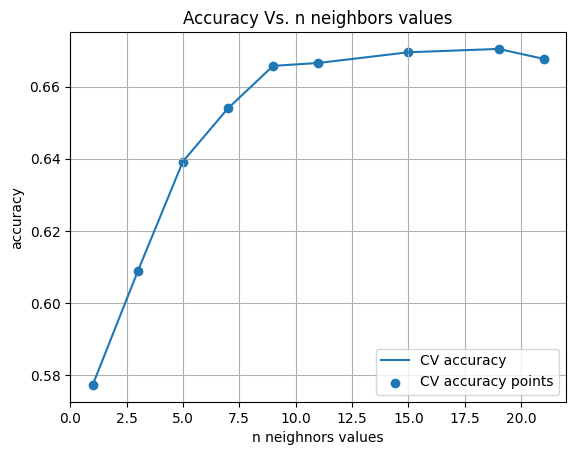

In [12]:
# Finding the Best Model (best combination of parameters)  

# Initialize the estimator (K- Nearest Neighbours) 
# In the context of GridSearchCV, the estimator is the model whose hyperparameters you want to optimize
knn = KNeighborsClassifier(n_jobs=-1) 

param_grid = {'n_neighbors' : [1, 3, 5, 7, 9, 11, 15, 19, 21]}   #hyper-parameter grid
# Grid is a dictionary where Keys : hyperparameter names, Values : lists of possible values. 
# (here we have only k in hyper-parameters) 

# Different Models M1, M2 .... means same K- Nearest Neighbours model with different combinations of hyperparamters values

# Seting up the GridSearchCV 
# GridSearchCV = a grid of Models M1, M2, M3.... (K- Nearest Neighbours models with all possible combinations of hyper-parameters)
grid_search = GridSearchCV(knn, param_grid,scoring = 'roc_auc')

# Fitting the grid of models M1, M2, M3.... on training data
grid_search.fit(x_train_processed, y_train)

# Print best parameters, best score and best model
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (Accuracy) on Training data: {grid_search.best_score_}") # Score (accuracy) from best combination of parameters (on training data)
print(f"Best Model : {grid_search.best_estimator_}")

# Evaluating accuracy of the best model (best combination of parameters)on the testing data
best_model = grid_search.best_estimator_
print(f"Score (Accuracy) on Testing Data: {best_model.score(x_test_processed, y_test)}") # Score (accuracy) (on testing data)

# Access the cv_results_ attribute ( cv_results_ attribute is a dictionary that contains detailed information about the results of the grid search)
cv_results_df = pd.DataFrame.from_dict(grid_search.cv_results_)

# Printing the cv_results_ in the form of a DataFrame
cv_results_df = cv_results_df.sort_values(['param_n_neighbors'])
print(cv_results_df)

#train_score = cv_results_df['mean_train_score']
CV_accuracy = cv_results_df['mean_test_score']
n_neighnors_values = cv_results_df['param_n_neighbors'] 

#plotting accuracy (auc) Vs. n_neighbors value
plt.plot(n_neighnors_values, CV_accuracy, label = 'CV accuracy')   # auc = accuracy
plt.scatter(n_neighnors_values, CV_accuracy, label = 'CV accuracy points')
plt.legend()
plt.xlabel('n neighnors values')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. n neighbors values')
plt.grid()
plt.show()

Predicted output on Testing Data: [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted output as Prob. of Class 1 on Testing Data : [0.94736842 0.94736842 0.68421053 0.47368421 0.84210526 1.
 0.73684211 1.         0.94736842 1.    

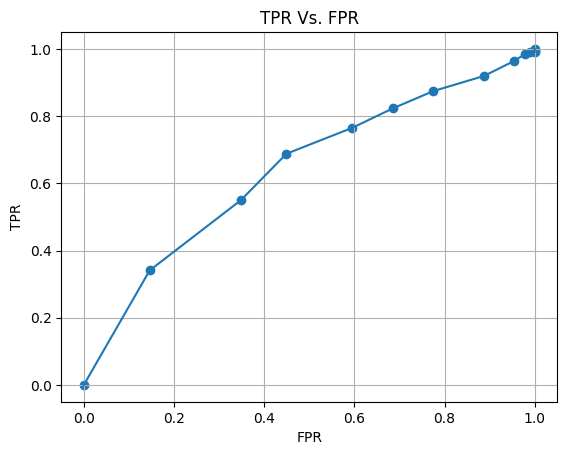

Best Threshold value T : 0.8947368421052632
Value of TPR*(1-FPR) at T : 0.37884316629936055
Predicted output on Testing Data considering Threshold T: [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 

In [14]:
# For the Best Model M1, plotting TPR Vs. FPR Curve, finding the best Threshold value T, obtaining predicted output considering Threshold T 

from sklearn.metrics import roc_curve, auc

knn_m1 = KNeighborsClassifier(n_neighbors = 19, n_jobs=-1) 

# Fitting the best Model M1 on training data
knn_m1.fit(x_train_processed, y_train)

#predicting output (class) , probabilities for class 1 on testing data
y_test_pred = knn_m1.predict(x_test_processed)   #by default threshold value used in .predict() is 0.5
print(f"Predicted output on Testing Data: {y_test_pred}")
y_test_pred_prob = knn_m1.predict_proba(x_test_processed)[:, 1]  # ":"represnts all rows, "1" represents second column
print(f"Predicted output as Prob. of Class 1 on Testing Data : {y_test_pred_prob}")

# Using roc_curve fn. that gives list of Threshold values, list of TPR values, list of FPR values
FPR, TPR, Threshold = roc_curve(y_test, y_test_pred_prob)

#plotting ROC Curve i.e TPR Vs. FPR (corresponding to each threshold value)
plt.plot(FPR, TPR)   #in ROC auc (area under curve) represents nothing but accuracy
plt.scatter(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('TPR Vs. FPR')
plt.grid()
plt.show()

#finding best Threshold Value T
#def best_threshold_value(FPR, TPR, Threshold):
T = Threshold[np.argmax(TPR*(1-FPR))]
print(f"Best Threshold value T : {T}")
print(f"Value of TPR*(1-FPR) at T : {max(TPR*(1-FPR))}")
    #return T

#predicting output (class) using threshold value T on testing data 
#def predict_output_using_T
y_test_pred_using_T = []
for i in y_test_pred_prob:
    if i >= T: 
        y_test_pred_using_T.append(1)
    else: 
        y_test_pred_using_T.append(0)
print(f"Predicted output on Testing Data considering Threshold T: {y_test_pred_using_T}")
#return ytest_pred_using_T


Confusion Matrix :
[[ 49  40]
 [ 97 214]]
type of confusion matrix: <class 'numpy.ndarray'>


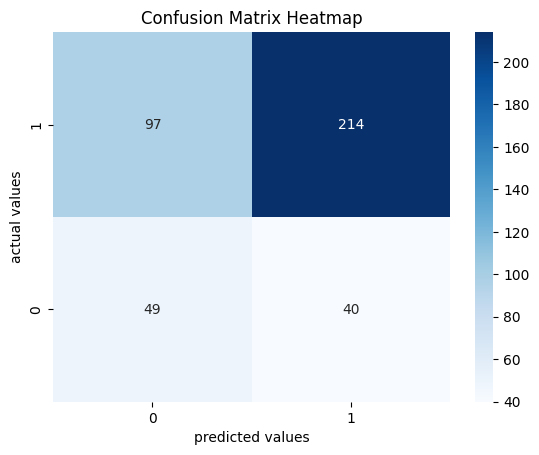

Final accuracy as per confusion matrix: 0.6575


In [17]:
# For the Best Model M1, best Threshold value T, plotting confusion matrix (FPR, TPR, FNR, TNR)

from sklearn.metrics import confusion_matrix
import seaborn as sns     #for heatmap

confusionmatrix = confusion_matrix(y_test, y_test_pred_using_T)
print(f"Confusion Matrix :\n{confusionmatrix}")
print(f"type of confusion matrix: {type(confusionmatrix)}")   #a00 = TN , a01 = FP, a10 = FN, a11 = TP 
# Actuacl -> Vertical (0,1), Predicted -> Horizontal (0,1)

#Visualizing confusion matrix using Seaborn library's heatmap function
ax= sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues')
ax.set_ylim([0,2])
#Customize the plot with additional settings from Matplotlib
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Confusion Matrix Heatmap')
plt.show()

# annot=True: Adds numerical annotations to each cell in the heatmap for better readability.
# fmt='d': Specifies that the annotations should be formatted as integers.
# cmap='Blues': Specifies the color map to use for the heatmap, in this case, shades of blue.

from sklearn.metrics import accuracy_score

print(f"Final accuracy as per confusion matrix: {accuracy_score(y_test, y_test_pred_using_T)}")